In [8]:
import pandas as pd

In [9]:
data=pd.read_csv("breast-cancer.csv")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data['diagnosis'] = data['diagnosis'].astype('category')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

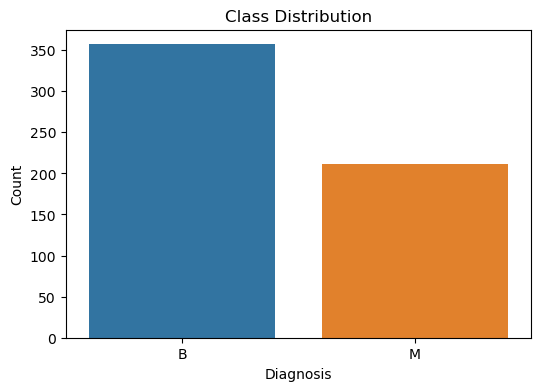

In [14]:
class_counts = data['diagnosis'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

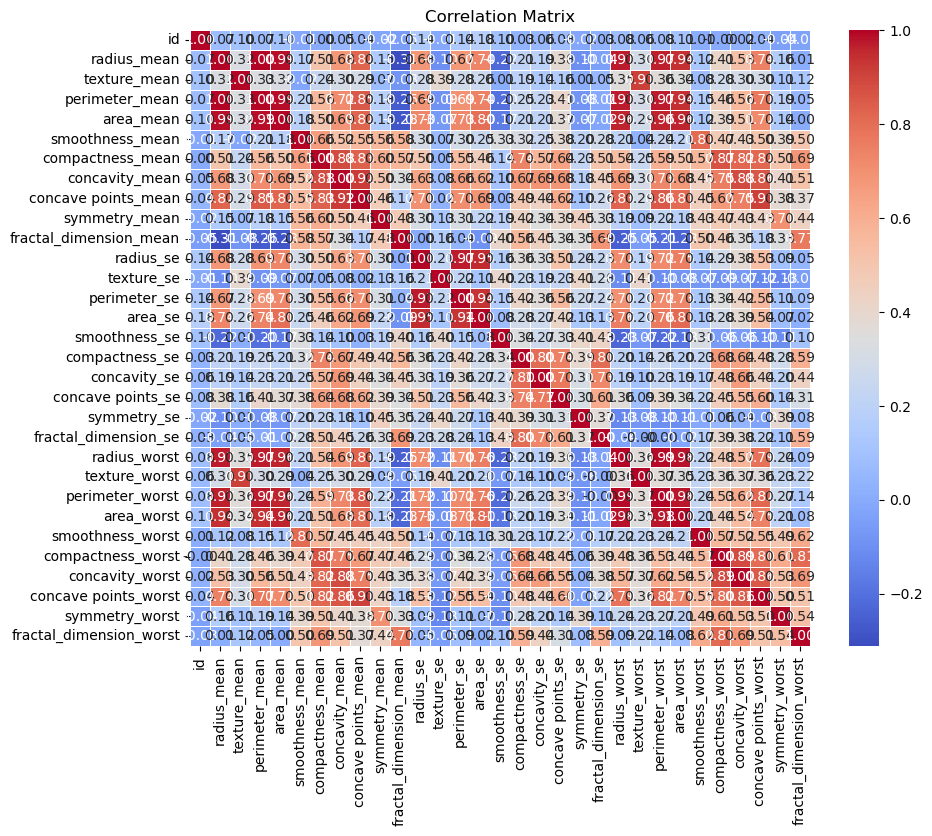

In [15]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
from sklearn.svm import SVC

In [17]:
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']
svm = SVC(kernel='linear')
svm.fit(X, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': svm.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance)

Feature Importance:
                    Feature  Importance
26          concavity_worst    1.598324
28           symmetry_worst    1.027741
27     concave points_worst    0.758674
6            concavity_mean    0.683706
25        compactness_worst    0.585874
24         smoothness_worst    0.518799
7       concave points_mean    0.418969
8             symmetry_mean    0.415848
4           smoothness_mean    0.292607
5          compactness_mean    0.245077
21            texture_worst    0.232890
22          perimeter_worst    0.101171
20             radius_worst    0.087764
13                  area_se    0.087013
16             concavity_se    0.076276
17        concave points_se    0.066708
29  fractal_dimension_worst    0.063712
2            perimeter_mean    0.060987
14            smoothness_se    0.054775
18              symmetry_se    0.050688
10                radius_se    0.045695
9    fractal_dimension_mean    0.017464
23               area_worst    0.002260
3                 ar

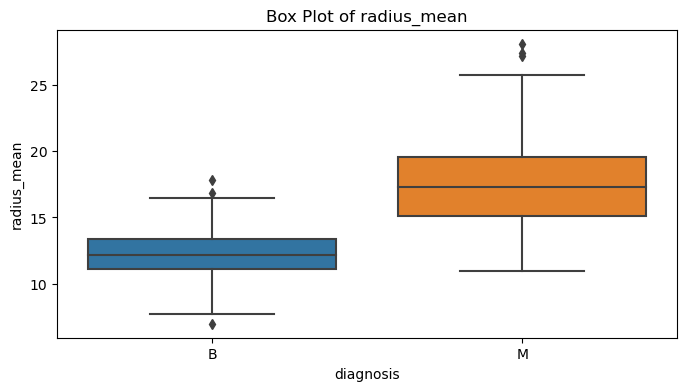

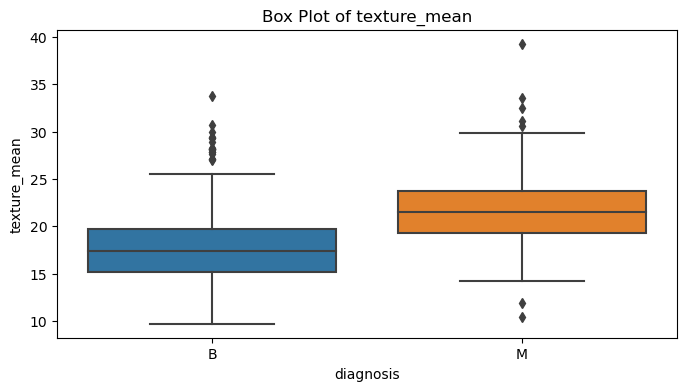

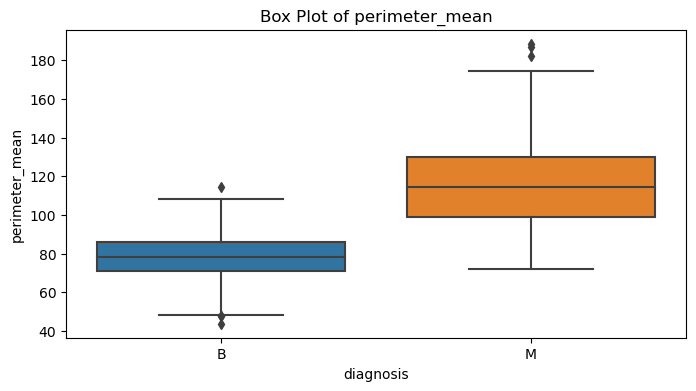

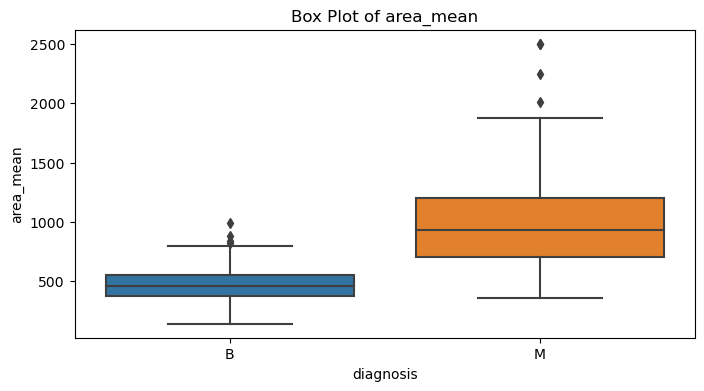

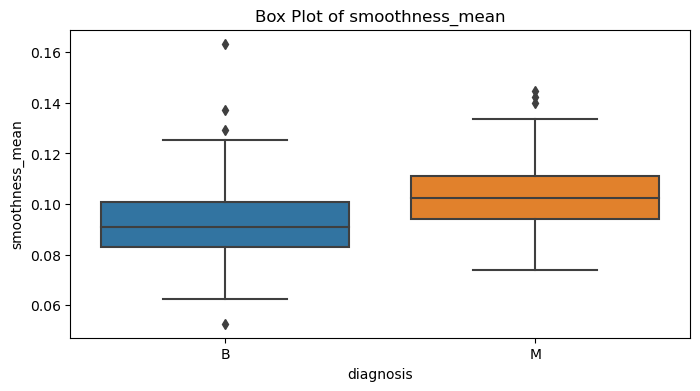

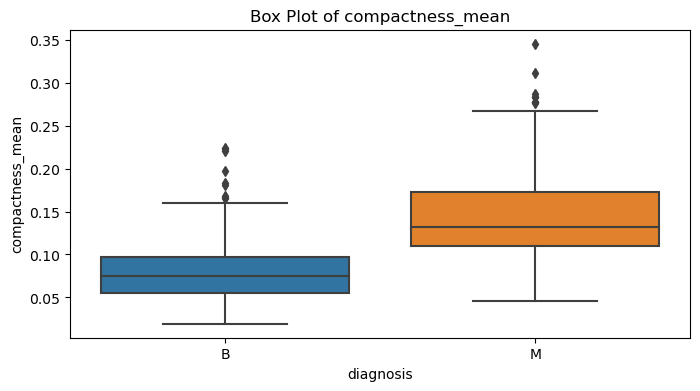

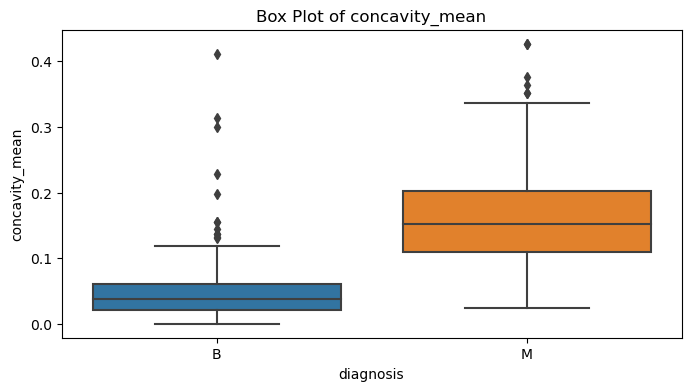

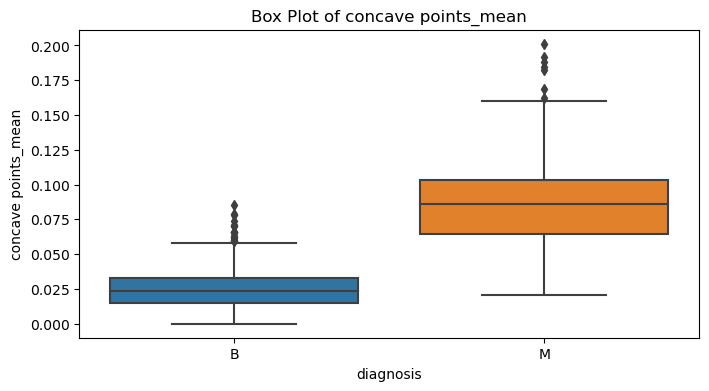

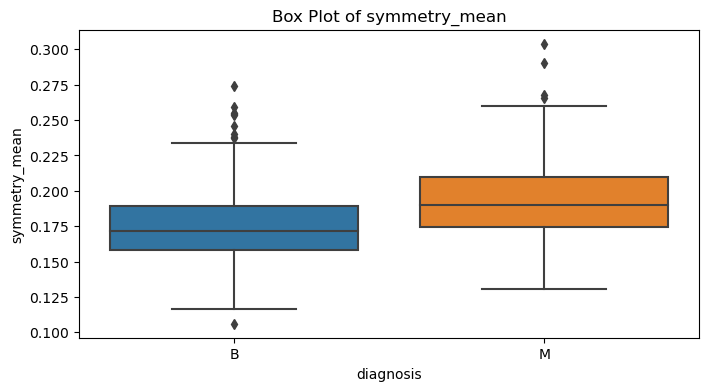

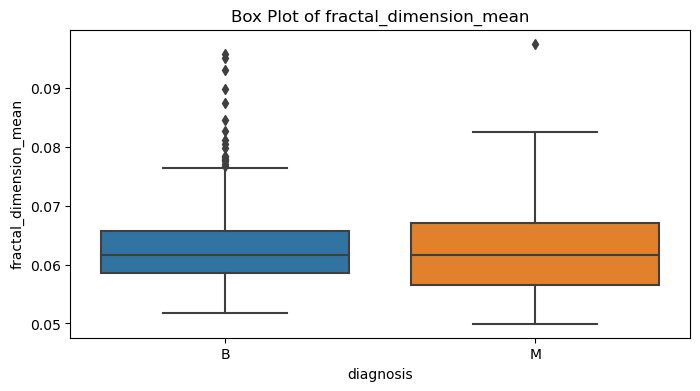

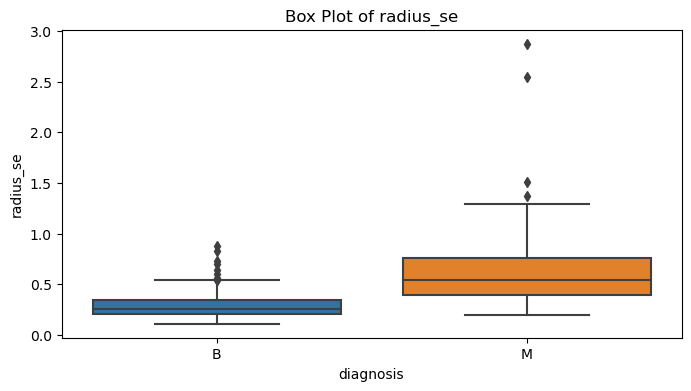

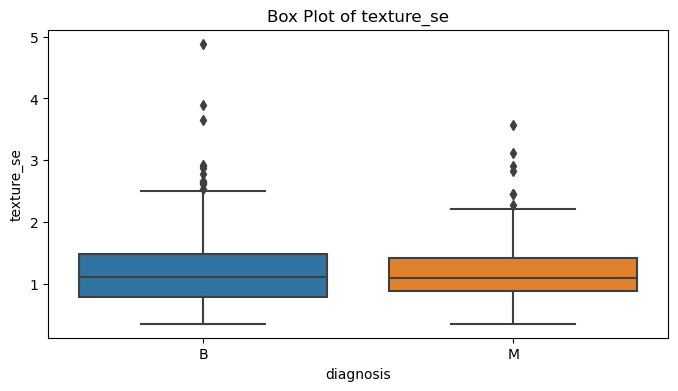

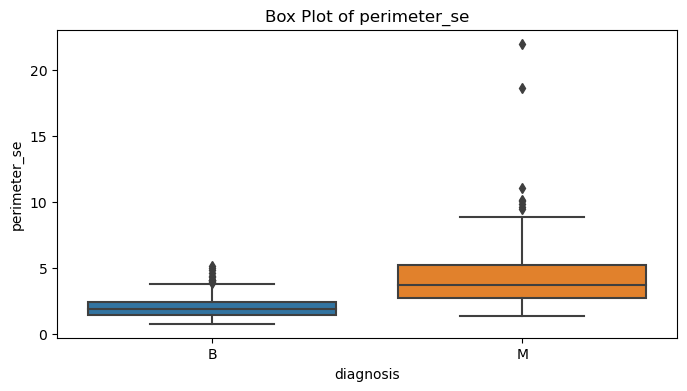

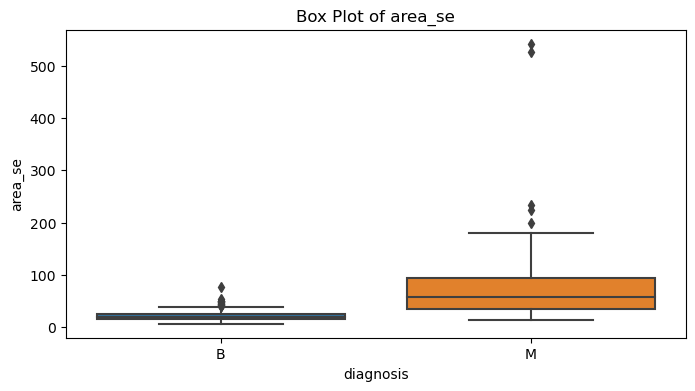

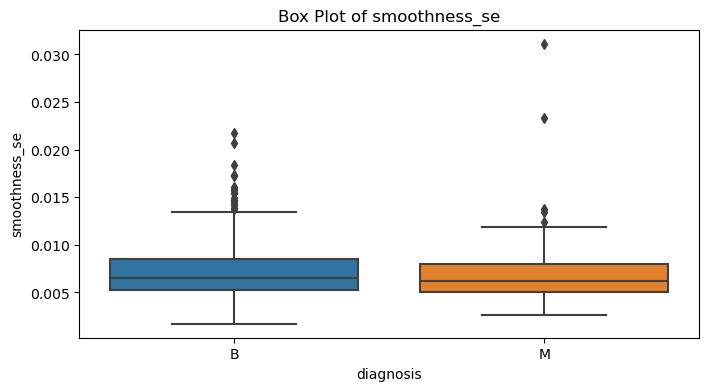

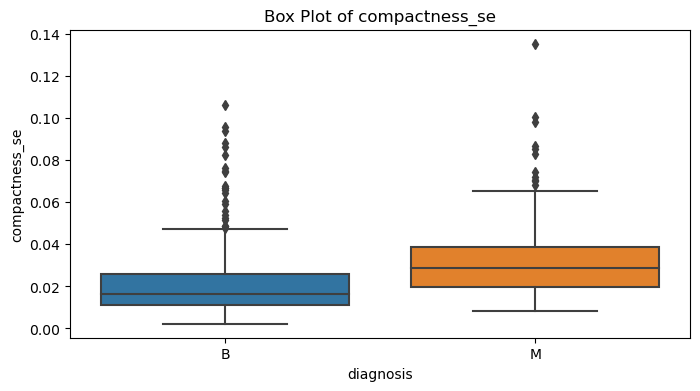

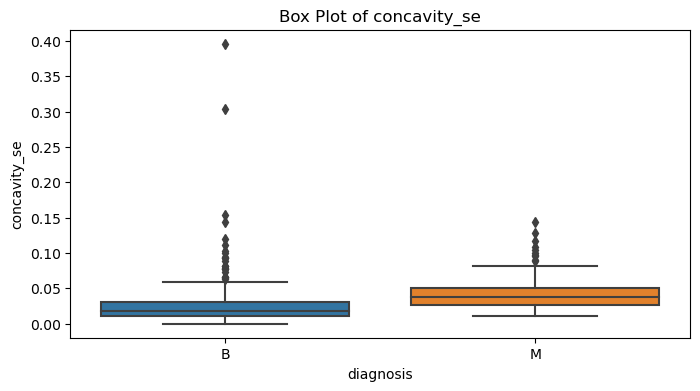

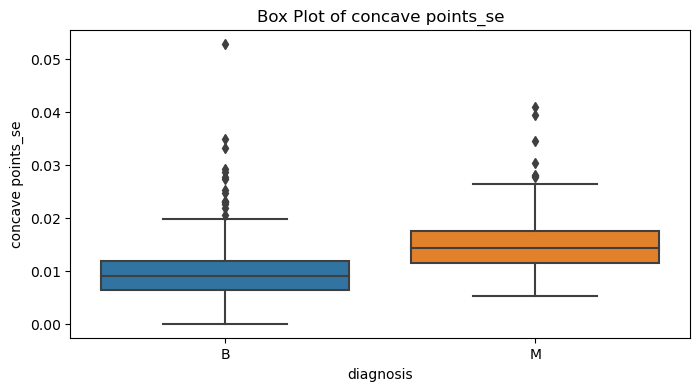

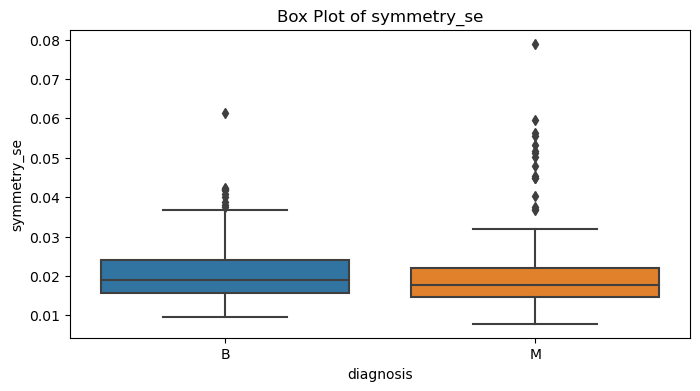

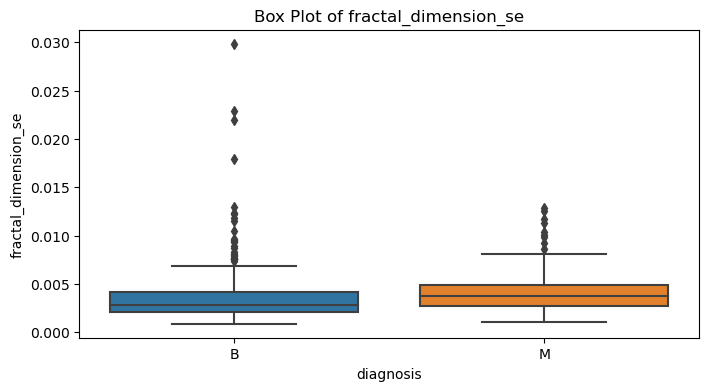

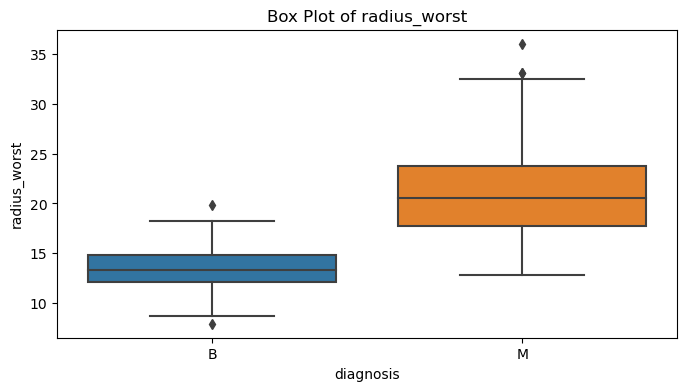

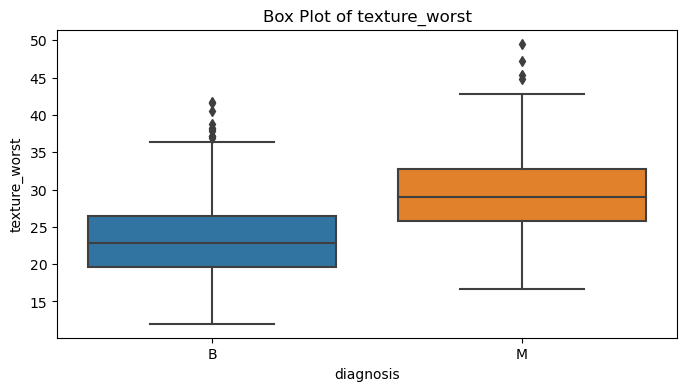

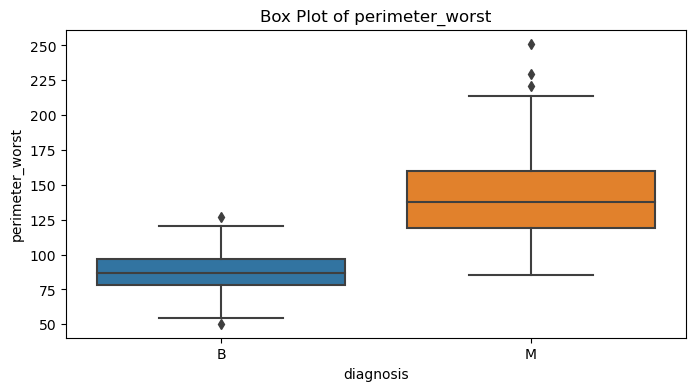

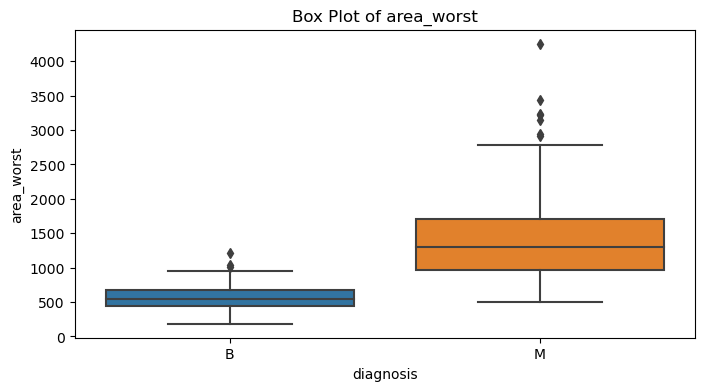

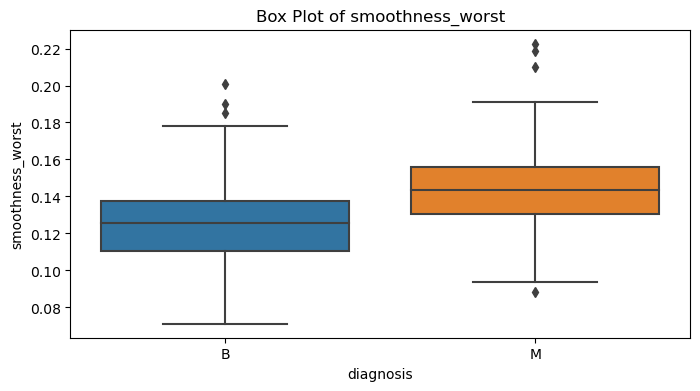

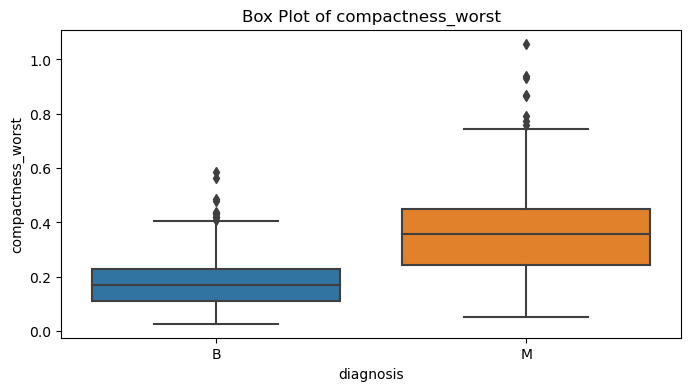

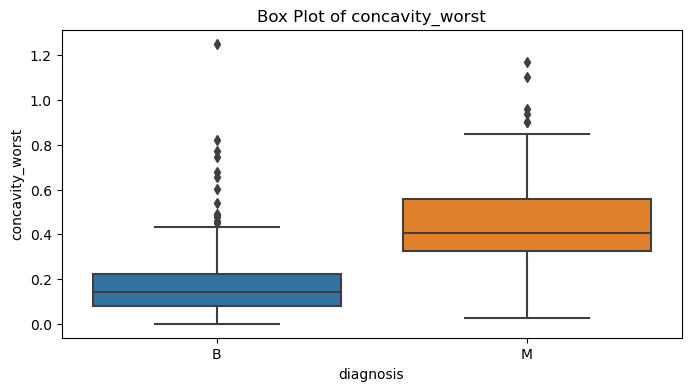

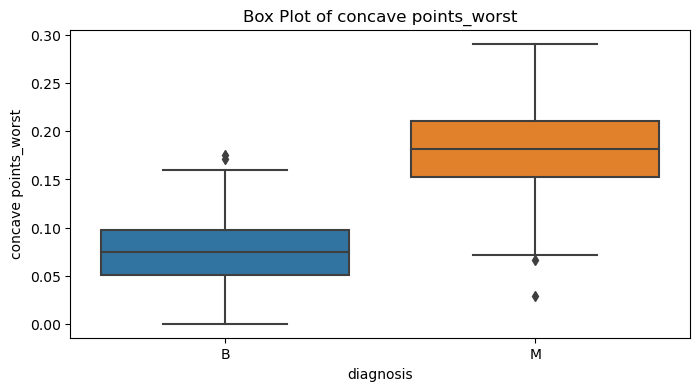

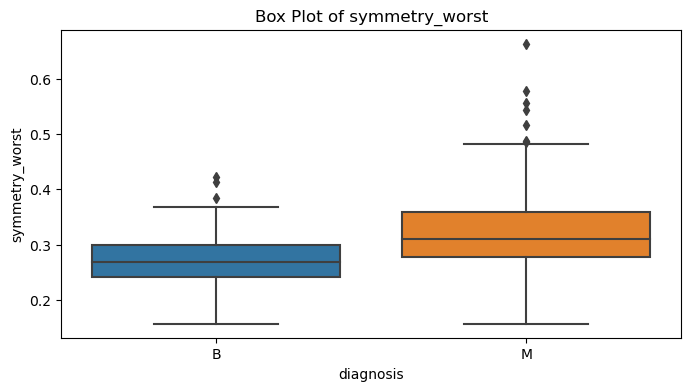

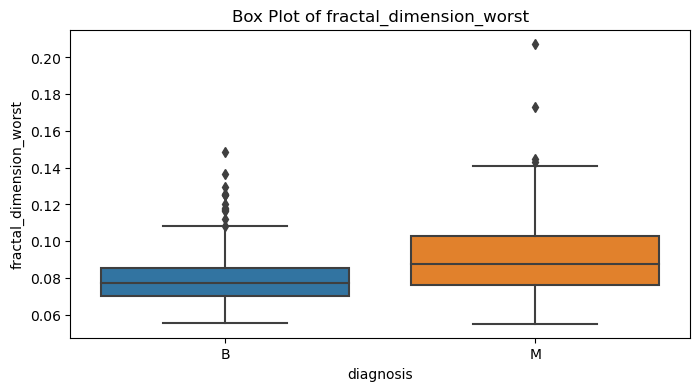

In [18]:
features = data.columns[2:]  # Exclude 'id' and 'diagnosis' columns
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title('Box Plot of {}'.format(feature))
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
SVM=SVC()

In [22]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_search = GridSearchCV(SVM, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [25]:
print("Best Kernel: ", grid_search.best_params_['kernel'])
print("Best Score: ", grid_search.best_score_)

Best Kernel:  linear
Best Score:  0.9455364073901569


In [26]:
svm.fit(X_train, y_train) 

SVC(kernel='linear')

In [27]:
y_pred = svm.predict(X_test)

In [28]:
report = classification_report(y_test, y_pred)  # Evaluate the model's performance
print(report)

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

